In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2

#score 
from sklearn.metrics import accuracy_score, confusion_matrix,  precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("/Users/tanachock14xii/Downloads/healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

number of patients that not have a stroke =  4861
number of patients that have a stroke =  249


Text(0.5, 1.0, 'Comparison between patients with strokes and without stroke (before smote method)')

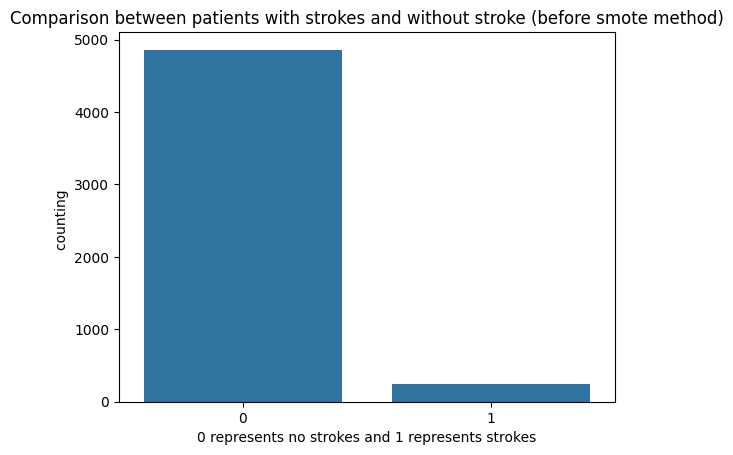

In [6]:
#explore target data
y = df['stroke']
yf =  pd.DataFrame(y)
print("number of patients that not have a stroke = " , y.value_counts()[0])
print("number of patients that have a stroke = " , y.value_counts()[1])

sns.countplot(x= y)
plt.xlabel("0 represents no strokes and 1 represents strokes")
plt.ylabel("counting ")
plt.title('Comparison between patients with strokes and without stroke (before smote method)')

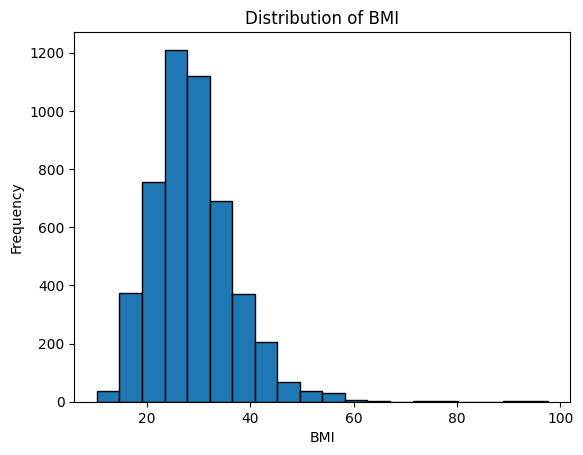

In [7]:
plt.hist(df['bmi'], bins=20, edgecolor='black')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [8]:
# handling missing values
avg = df['bmi'].mean()

df.bmi = (df.bmi.fillna(28.89))
print("AVG of this Adult BMI values = ", avg)

AVG of this Adult BMI values =  28.893236911794666


In [9]:
# tranforms 
target = 'stroke'
X = df.loc[:,df.columns!=target]
y = df.loc[:,df.columns==target]

columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']
X = pd.get_dummies(X[columns])

stroke
0    4861
1     249
Name: count, dtype: int64


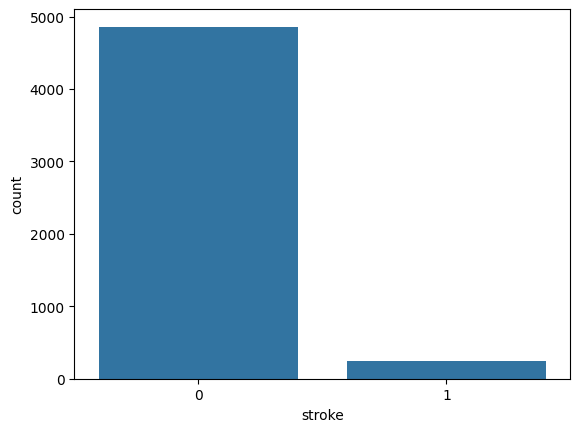

In [10]:
ax = sns.countplot(x=target,data=y)
print(y[target].value_counts())

In [11]:
#handle imbalance dataset

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

stroke
1    4861
0    4861
Name: count, dtype: int64


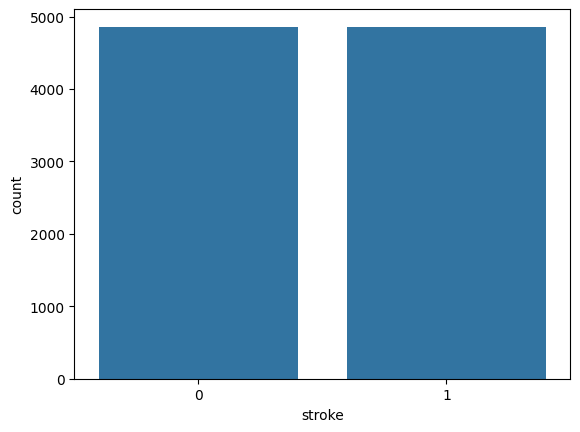

In [12]:
ax = sns.countplot(x=target,data=y)
print(y[target].value_counts())

In [13]:
#train test spilt
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.50,random_state= 42)

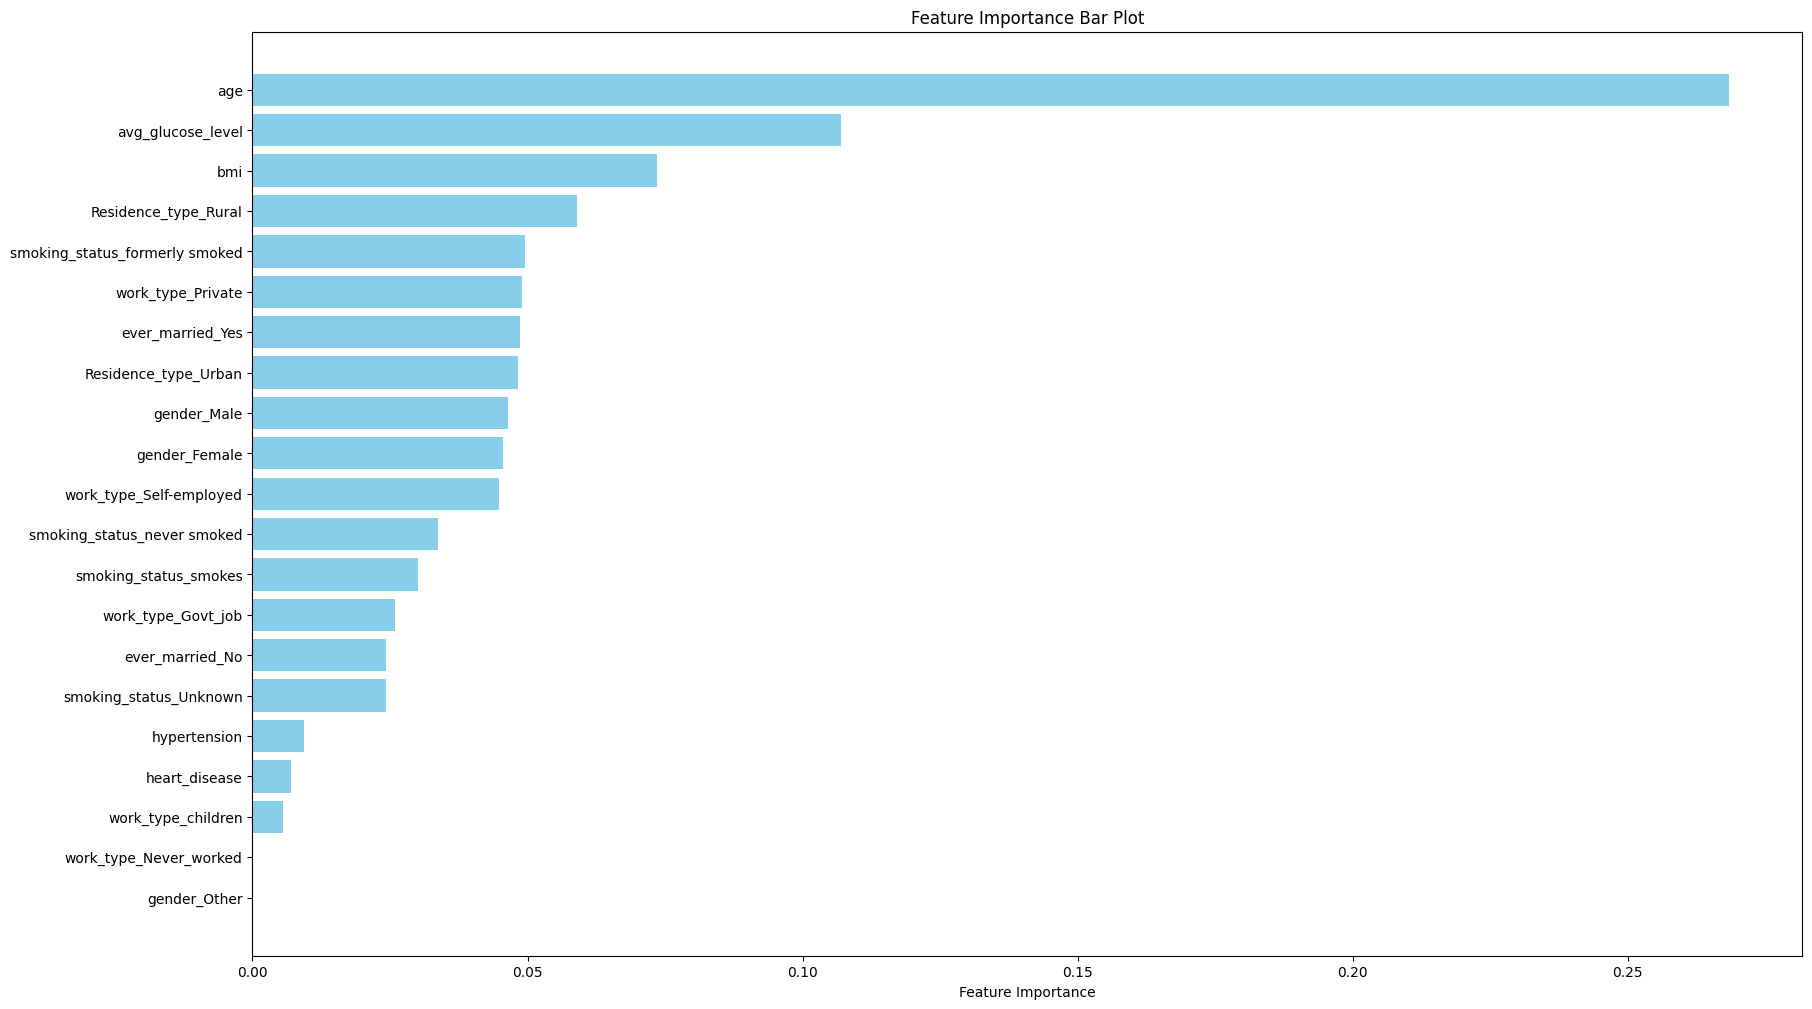

In [14]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y.values.ravel())  # Use .values.ravel() to flatten the y array

# Get feature importances from the classifier
importances = clf.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Create a bar plot to show feature importances
plt.figure(figsize=(20, 12))
plt.barh(sorted_feature_names, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Bar Plot')
plt.gca().invert_yaxis()

plt.show()

In [15]:
rf_precm = 0 
rf_testcm =0

for d in range(1,20):
  rf =RandomForestClassifier(class_weight='balanced' , random_state=42,max_depth=d , n_estimators = 300)
  rf.fit(x_train,y_train)

  rf_pre = rf.predict(x_test)

  rf_ac = accuracy_score(y_test,rf_pre)
  rf_re = recall_score(y_test,rf_pre)
  rf_presis = precision_score(y_test,rf_pre)
  rf_f1 = f1_score(y_test,rf_pre)

  if(d == 13 ):
    rf_testcm = y_test
    rf_precm = rf_pre

  print("max_depth: =  ", d)
  print("accuracy_score: ",rf_ac)
  print("recall_score: ", rf_re)
  print("precision_score: ",rf_presis)
  print("f1_score: ", rf_f1)

print('')

/Users/tanachock14xii/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max_depth: =   1
accuracy_score:  0.7885208804772681
recall_score:  0.8891677122542869
precision_score:  0.7358947732779508
f1_score:  0.8053030303030303


/Users/tanachock14xii/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max_depth: =   2
accuracy_score:  0.8010697387368854
recall_score:  0.9092429945629443
precision_score:  0.7435020519835841
f1_score:  0.8180620884289747


/Users/tanachock14xii/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max_depth: =   3
accuracy_score:  0.8195844476445175
recall_score:  0.9251359263906316
precision_score:  0.7601374570446735
f1_score:  0.8345595170722505


/Users/tanachock14xii/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max_depth: =   4
accuracy_score:  0.8498251388603169
recall_score:  0.9393559180259305
precision_score:  0.7933592370187214
f1_score:  0.8602068173113749


/Users/tanachock14xii/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max_depth: =   5
accuracy_score:  0.8860316807241309
recall_score:  0.9473023839397742
precision_score:  0.8410694392870405
f1_score:  0.8910306845003934


/Users/tanachock14xii/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max_depth: =   6
accuracy_score:  0.9144209010491668
recall_score:  0.9531576746131326
precision_score:  0.8823073945025165
f1_score:  0.9163650985122638


/Users/tanachock14xii/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max_depth: =   7
accuracy_score:  0.9331413289446616
recall_score:  0.9556670849017148
precision_score:  0.9125399361022364
f1_score:  0.933605720122574


/Users/tanachock14xii/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max_depth: =   8
accuracy_score:  0.9479530960707674
recall_score:  0.9552488498536177
precision_score:  0.939917695473251
f1_score:  0.9475212611491391


/Users/tanachock14xii/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max_depth: =   9
accuracy_score:  0.9578276074881712
recall_score:  0.9544123797574237
precision_score:  0.9596299411269975
f1_score:  0.9570140490668904


/Users/tanachock14xii/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max_depth: =   10
accuracy_score:  0.962764863196873
recall_score:  0.9531576746131326
precision_score:  0.9706132879045997
f1_score:  0.9618062882464655


/Users/tanachock14xii/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max_depth: =   11
accuracy_score:  0.9646163340876363
recall_score:  0.9539941447093266
precision_score:  0.9735381988903116
f1_score:  0.9636670891423743


/Users/tanachock14xii/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max_depth: =   12
accuracy_score:  0.9693478708084756
recall_score:  0.9560853199498118
precision_score:  0.9811158798283262
f1_score:  0.9684388900656641


/Users/tanachock14xii/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max_depth: =   13
accuracy_score:  0.9681135568813002
recall_score:  0.9556670849017148
precision_score:  0.9790059982862039
f1_score:  0.9671957671957672


/Users/tanachock14xii/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max_depth: =   14
accuracy_score:  0.9693478708084756
recall_score:  0.9569217900460059
precision_score:  0.9802913453299057
f1_score:  0.9684656084656085


/Users/tanachock14xii/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max_depth: =   15
accuracy_score:  0.9697593087842008
recall_score:  0.9560853199498118
precision_score:  0.9819587628865979
f1_score:  0.9688493324856962


/Users/tanachock14xii/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max_depth: =   16
accuracy_score:  0.9695535897963382
recall_score:  0.9565035549979088
precision_score:  0.9811239811239811
f1_score:  0.9686573485811097


/Users/tanachock14xii/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max_depth: =   17
accuracy_score:  0.9697593087842008
recall_score:  0.9573400250941029
precision_score:  0.980719794344473
f1_score:  0.9688888888888889


/Users/tanachock14xii/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max_depth: =   18
accuracy_score:  0.9695535897963382
recall_score:  0.9569217900460059
precision_score:  0.9807115302186027
f1_score:  0.9686706181202371


/Users/tanachock14xii/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max_depth: =   19
accuracy_score:  0.9687307138448878
recall_score:  0.9569217900460059
precision_score:  0.979032948224219
f1_score:  0.9678510998307953



In [16]:


rf1 =RandomForestClassifier(class_weight='balanced' , random_state=42, n_estimators = 100 , max_depth=13)
rf1.fit(x_train,y_train)

rf_pre1 = rf1.predict(x_test)

rf_ac1 = accuracy_score(y_test,rf_pre1)
rf_re1 = recall_score(y_test,rf_pre1)
rf_presis1 = precision_score(y_test,rf_pre1)
rf_f1_1 = f1_score(y_test,rf_pre1)

print("accuracy_score: ",rf_ac1)
print("recall_score: ", rf_re1)
print("precision_score: ",rf_presis1)
print("f1_score: ", rf_f1_1)



/Users/tanachock14xii/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


accuracy_score:  0.9674963999177124
recall_score:  0.9569217900460059
precision_score:  0.9765258215962441
f1_score:  0.966624419095902


In [17]:
logis = LogisticRegression(class_weight= "balanced")
logis.fit(x_train,y_train)
logis_pre = logis.predict(x_test) 

logis_ac = accuracy_score(y_test,logis_pre)
logis_re = recall_score(y_test,logis_pre)
logis_presis = precision_score(y_test,logis_pre)
logis_f1 = f1_score(y_test,logis_pre)

print("accuracy_score: ",logis_ac)
print("recall_score: ", logis_re)
print("precision_score: ",logis_presis)
print("f1_score: ", logis_f1)

accuracy_score:  0.9580333264760338
recall_score:  0.9222082810539524
precision_score:  0.9919028340080972
f1_score:  0.9557867360208062


/Users/tanachock14xii/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tanachock14xii/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


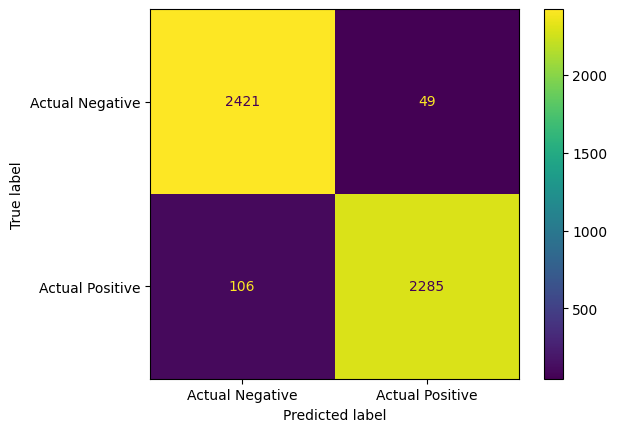

In [18]:

class_labels = ['Actual Negative', 'Actual Positive']
cm = confusion_matrix(rf_testcm , rf_precm)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm , display_labels= class_labels )
cm_display.plot()
plt.show()


In [19]:


Km = RandomForestClassifier(class_weight='balanced' , random_state=42,max_depth=13 , n_estimators = 100)
k= 20
kf = KFold(n_splits=k, shuffle=True, random_state=42)

scores = cross_val_score(Km, X, y, cv=kf, scoring='accuracy')

for fold, score in enumerate(scores, start=1):
    print(f'Fold {fold}: Accuracy = {score:.2f}')

/Users/tanachock14xii/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/tanachock14xii/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/tanachock14xii/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/tanachock14xii/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 

Fold 1: Accuracy = 0.97
Fold 2: Accuracy = 0.96
Fold 3: Accuracy = 0.97
Fold 4: Accuracy = 0.97
Fold 5: Accuracy = 0.97
Fold 6: Accuracy = 0.97
Fold 7: Accuracy = 0.98
Fold 8: Accuracy = 0.96
Fold 9: Accuracy = 0.97
Fold 10: Accuracy = 0.99
Fold 11: Accuracy = 0.96
Fold 12: Accuracy = 0.97
Fold 13: Accuracy = 0.98
Fold 14: Accuracy = 0.98
Fold 15: Accuracy = 0.98
Fold 16: Accuracy = 0.97
Fold 17: Accuracy = 0.97
Fold 18: Accuracy = 0.97
Fold 19: Accuracy = 0.96
Fold 20: Accuracy = 0.98
